SetUp

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
%matplotlib inline
from pandas import Series , DataFrame

This program to predict student score from number of hours

Import data

In [16]:
data = pd.read_csv('score.csv')
data.head()


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


store number of rows in r variable to traverse throw , print x and y

In [46]:
m = len(data)
print("Hours       Score " )
# i Will store the data to x axis and y axis for easy plot
x = []
y = []
for i in range(m): 
    x.append(data.loc[i][0])
    y.append(data.loc[i][1])
    print(data.loc[i][0] ,"   |   ", data.loc[i][1])
print("\nNumber of training examples (m):" , m)

Hours       Score 
2.5    |    21.0
5.1    |    47.0
3.2    |    27.0
8.5    |    75.0
3.5    |    30.0
1.5    |    20.0
9.2    |    88.0
5.5    |    60.0
8.3    |    81.0
2.7    |    25.0
7.7    |    85.0
5.9    |    62.0
4.5    |    41.0
3.3    |    42.0
1.1    |    17.0
8.9    |    95.0
2.5    |    30.0
1.9    |    24.0
6.1    |    67.0
7.4    |    69.0
2.7    |    30.0
4.8    |    54.0
3.8    |    35.0
6.9    |    76.0
7.8    |    86.0

Number of training examples (m): 25


Visualize the data

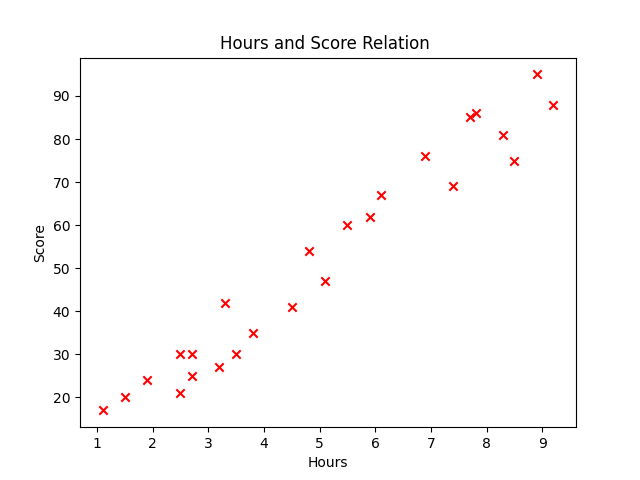

<Figure size 640x480 with 0 Axes>

In [ ]:
# a scatter plot comparing num_children and num_pets
plt.scatter(x, y, marker='x', c='r') 

# Set the title
plt.title("Hours and Score Relation ")
# Set the y-axis label
plt.ylabel('Score')
# Set the x-axis label
plt.xlabel('Hours')
plt.show()

Compute cost function

In [53]:
def compute_score(x, y, w, b): 
    # fw_b = w * x + b
    # cost function = 1 / 2m sum ( fw_b - y )^2
    total_score = 0
    m = len(x)
    for i in range(m):
        yTest = w * x[i] + b
        total_score += np.square(yTest - y[i])
        
    return total_score / (2*m)

In [76]:
# Compute cost with some initial values for paramaters w, b
initial_w = 0
initial_b = 0

score = compute_score(x, y , initial_w, initial_b)
print(type(score))
print(f'Cost at initial w: {score:.3f}')

<class 'numpy.float64'>
Cost at initial w: 1632.020


Create comput gradient function to use it in gradient descent

In [77]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray): Shape (m,) Input to the model (Population of cities) 
      y (ndarray): Shape (m,) Label (Actual profits for the cities)
      w, b (scalar): Parameters of the model  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    # number of tests
    m = len(x)
    
     # return values
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        fwb = w * x[i] + b
        dj_dwTest = (fwb - y[i]) * x[i]
        dj_dbTest = (fwb-y[i])
        dj_dw += dj_dwTest
        dj_db += dj_dbTest
        
    return dj_dw/m , dj_db/m

Gradient Desccent

In [78]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x :    (ndarray): Shape (m,)
      y :    (ndarray): Shape (m,)
      w_in, b_in : (scalar) Initial values of parameters of the model
      cost_function: function to compute cost
      gradient_function: function to compute the gradient
      alpha : (float) Learning rate
      num_iters : (int) number of iterations to run gradient descent
    Returns
      w : (ndarray): Shape (1,) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    
    # number of training examples
    m = len(x)
    
    # An array to store cost J and w's at each iteration — primarily for graphing later
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_dw, dj_db = gradient_function(x, y, w, b )  

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w, b, J_history, w_history #return w and J,w history for graphing

Now use gradient descent to find w and b 

In [102]:
# initialize fitting parameters. Recall that the shape of w is (n,)
initial_w = 0.
initial_b = 0.

# some gradient descent settings
iterations = 2000
alpha = 0.0001

w,b,_,_ = gradient_descent(x ,y, initial_w, initial_b, compute_score, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost  1621.67   
Iteration  200: Cost   459.55   
Iteration  400: Cost   137.75   
Iteration  600: Cost    48.64   
Iteration  800: Cost    23.96   
Iteration 1000: Cost    17.13   
Iteration 1200: Cost    15.24   
Iteration 1400: Cost    14.71   
Iteration 1600: Cost    14.57   
Iteration 1800: Cost    14.53   
w,b found by gradient descent: 9.896798076251098 1.6314437624926292


Now we will predict and plot the data

Text(0.5, 0, 'Hours')

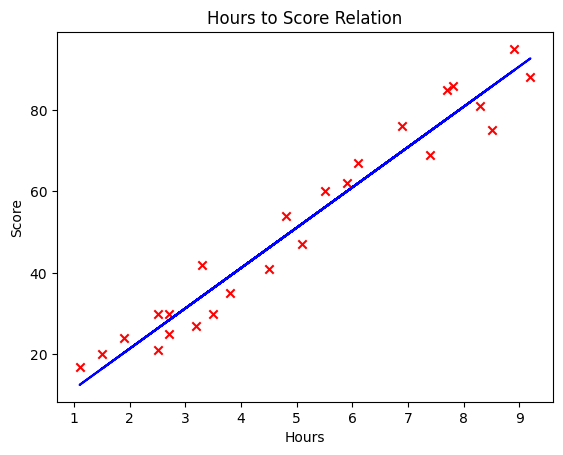

In [103]:
m = len(x)
predicted = np.zeros(m)

for i in range(m):
    # recall y' = w*x+b
    predicted[i] = w * x[i] + b
    
# Plot the linear fit
plt.plot(x, predicted, c = "b")

# Create a scatter plot of the data. 
plt.scatter(x, y, marker='x', c='r') 

# Set the title
plt.title("Hours to Score Relation")
# Set the y-axis label
plt.ylabel('Score')
# Set the x-axis label
plt.xlabel('Hours')

now we can use w and b to predict any score

In [104]:
predict1 = w * 3.5 + b
print('If you study for 3.5 hours you will get ', np.round(predict1) , 'Score!')

If you study for 3.5 hours you will get  36.0 Score!
